<a href="https://colab.research.google.com/github/luuloi/AppliedBioinformatics2023/blob/main/Lecture3/03_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Descriptive Statistics**

In [54]:
# Import data
data <- read.csv("https://raw.githubusercontent.com/luuloi/GWAS_Introduction_2023/main/data/StudentsPerformance.csv")
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [55]:
## Examine the structure of the data
str(data)

'data.frame':	1000 obs. of  8 variables:
 $ gender                     : chr  "female" "female" "female" "male" ...
 $ race.ethnicity             : chr  "group B" "group C" "group B" "group A" ...
 $ parental.level.of.education: chr  "bachelor's degree" "some college" "master's degree" "associate's degree" ...
 $ lunch                      : chr  "standard" "standard" "standard" "free/reduced" ...
 $ test.preparation.course    : chr  "none" "completed" "none" "none" ...
 $ math.score                 : int  72 69 90 47 76 71 88 40 64 38 ...
 $ reading.score              : int  72 90 95 57 78 83 95 43 64 60 ...
 $ writing.score              : int  74 88 93 44 75 78 92 39 67 50 ...


In [56]:
## Check the number of columns and rows
dim(data)

[1] 1000    8

In [57]:
## Check for NA values
table(is.na(data))


FALSE 
 8000 

In [58]:
## Remove rows with NA values, if any exist
data <- data[rowSums(is.na(data)) == 0, ]

## Remove columns with NA values, if any exist (This can be potentially dangerous, I commented it out. Uncomment only if necessary.)
# data <- data[, colSums(is.na(data)) == 0]

In [59]:
## Standard deviation and variance
sd(data$math.score) # standard deviation
var(data$math.score) # variance

[1] 15.16308

[1] 229.919

In [60]:
## Summary the data frame
summary(data)

    gender          race.ethnicity     parental.level.of.education
 Length:1000        Length:1000        Length:1000                
 Class :character   Class :character   Class :character           
 Mode  :character   Mode  :character   Mode  :character           
                                                                  
                                                                  
                                                                  
    lunch           test.preparation.course   math.score     reading.score   
 Length:1000        Length:1000             Min.   :  0.00   Min.   : 17.00  
 Class :character   Class :character        1st Qu.: 57.00   1st Qu.: 59.00  
 Mode  :character   Mode  :character        Median : 66.00   Median : 70.00  
                                            Mean   : 66.09   Mean   : 69.17  
                                            3rd Qu.: 77.00   3rd Qu.: 79.00  
                                            Max.   :100.00   Ma

In [61]:
# Create a data frame with the count of genders
data_new <- data.frame(table(data$gender))
colnames(data_new) <- c("gender", "lunch") # Rename the columns
head(data_new)

,gender,lunch
,<fct>,<int>
1,female,518
2,male,482


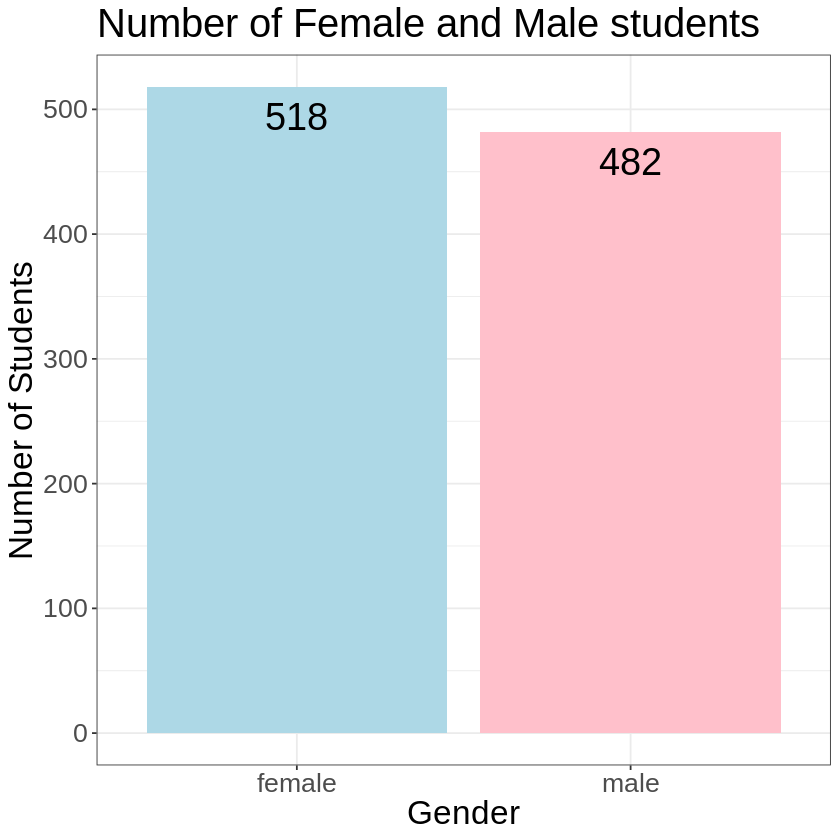

In [62]:
library(ggplot2)
## Barplot with multiple variables
ggplot(data_new, aes(x = gender, y = lunch, fill = gender)) +
    theme_bw() +
    geom_bar(stat = "identity") +
    geom_text(aes(label = lunch), vjust = 1.6, color = "black", size = 8) +
    theme(text = element_text(size = 20)) +
    theme(legend.position = "none") +
    labs(x = "Gender", y = "Number of Students", title = "Number of Female and Male students") +
    scale_fill_manual(values = c("lightblue", "pink"))

In [63]:
## Barplot with grouped data
data_new_2 <- data.frame(table(data$gender, data$lunch))
colnames(data_new_2) <- c("gender", "lunch", "freq")
head(data_new_2)

,gender,lunch,freq
,<fct>,<fct>,<int>
1,female,free/reduced,189
2,male,free/reduced,166
3,female,standard,329
4,male,standard,316


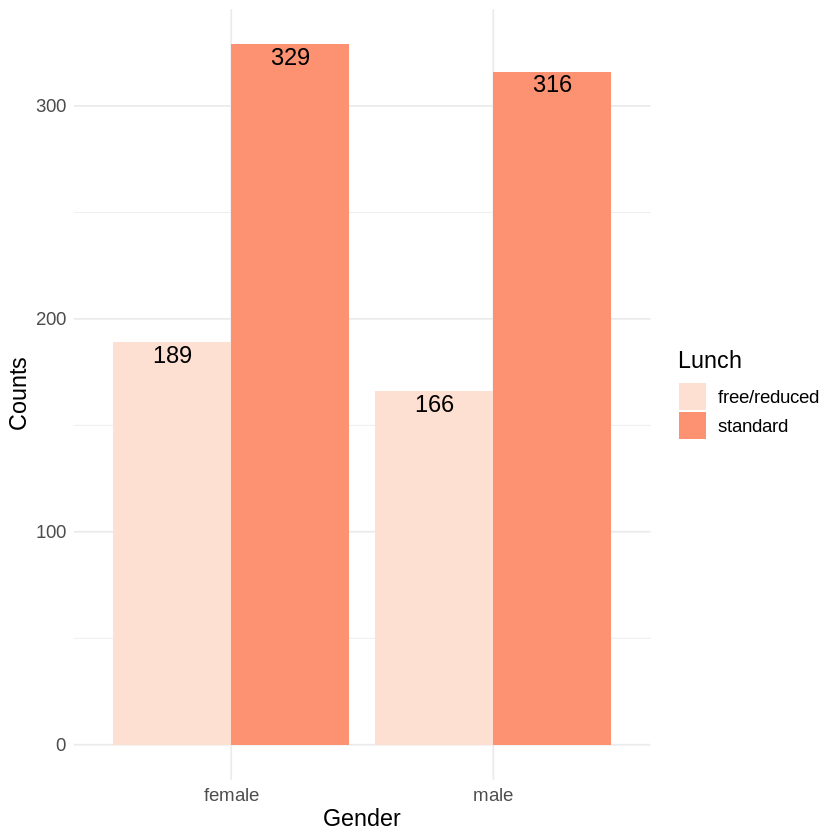

In [64]:
### Create grouped barplots
ggplot(data_new_2, aes(x = gender, y = freq, fill = lunch)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_text(aes(label = freq),
        vjust = 1.2,
        color = "black",
        position = position_dodge(0.9),
        size = 5
    ) +
    theme_minimal() +
    theme(text = element_text(size = 14)) +
    labs(fill = "Lunch", y = "Counts", x = "Gender") +
    scale_fill_brewer(palette = "Reds")

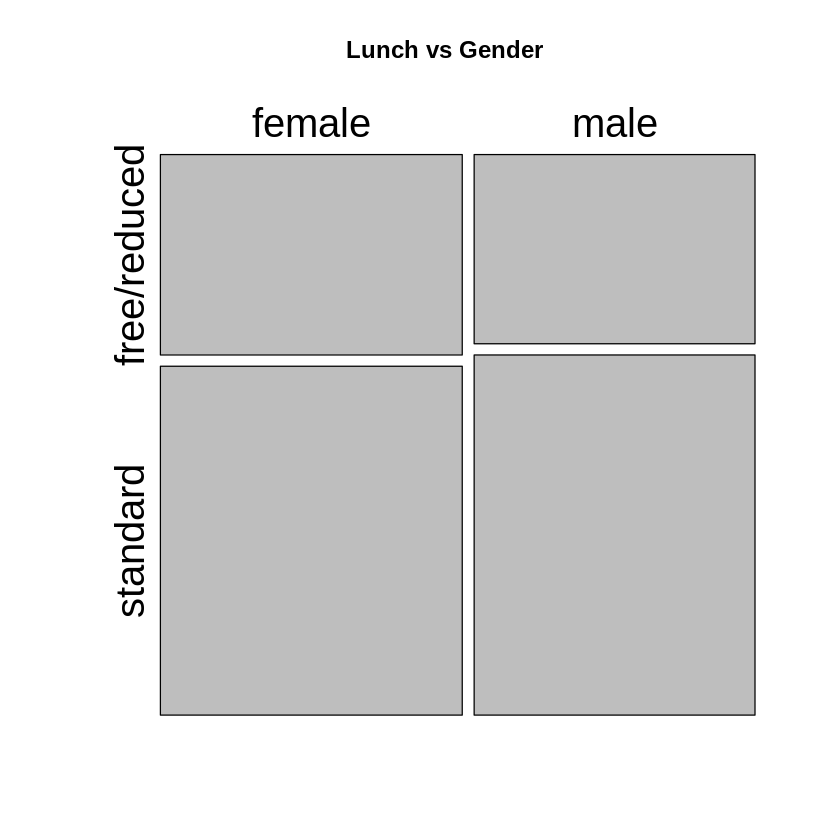

In [65]:
## Mosaicplot
mosaicplot(table(data$gender, data$lunch), cex = 2, main="Lunch vs Gender")

# Extra methods to visualize descriptive statistics

1. **Histogram**: Visualizes the distribution of a single continuous variable using bins.

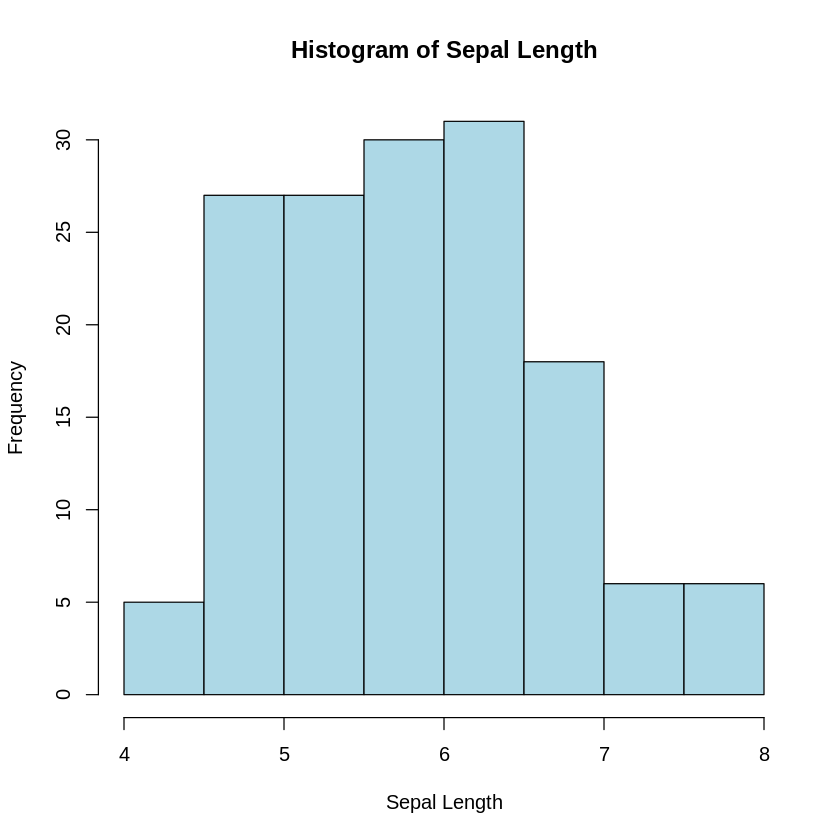

In [87]:
hist(iris$Sepal.Length, main="Histogram of Sepal Length", xlab="Sepal Length", col="lightblue", border="black")

2. **Box Plot**: Depicts the median, quartiles, and potential outliers of a continuous variable.

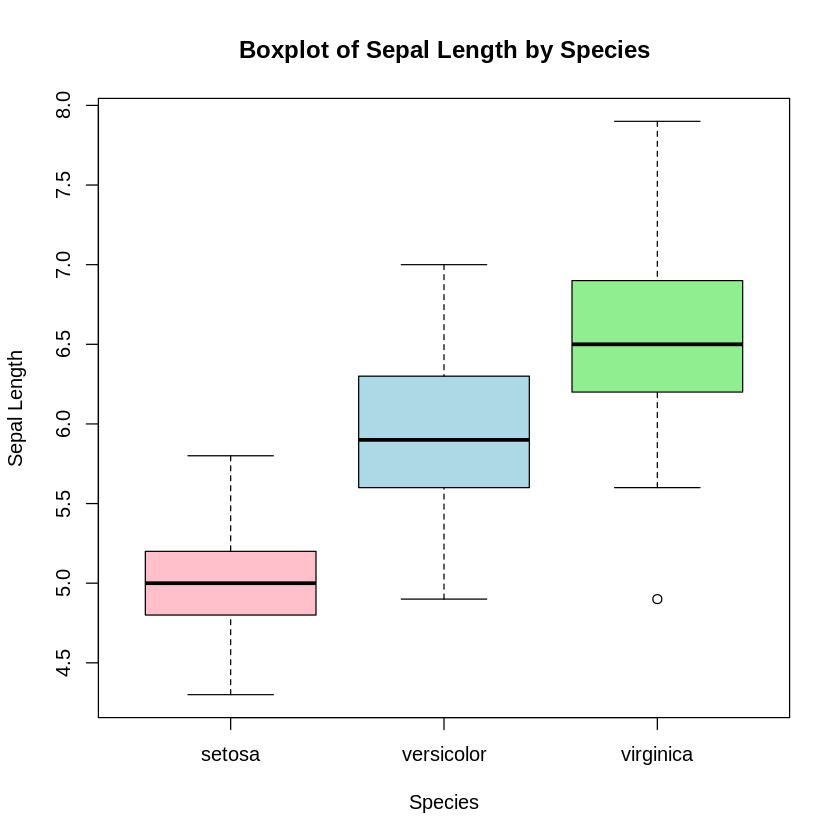

In [88]:
boxplot(iris$Sepal.Length ~ iris$Species, main="Boxplot of Sepal Length by Species", xlab="Species", ylab="Sepal Length", col=c("pink","lightblue","lightgreen"))

3. **Bar Chart**: Compares quantities across different categories using bars.

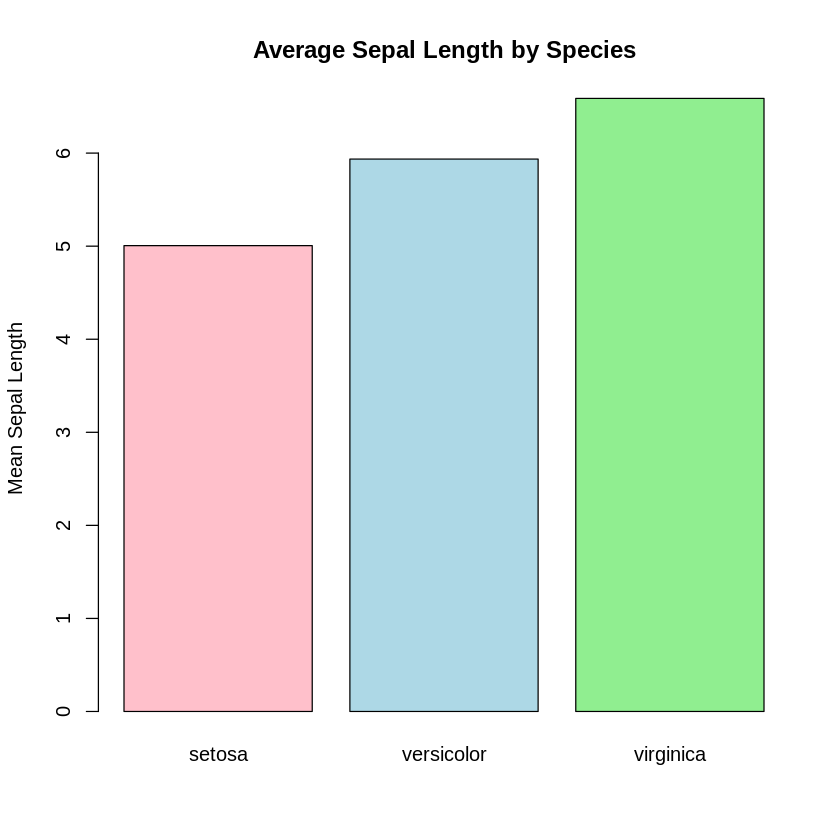

In [89]:
barplot(aggregate(iris$Sepal.Length ~ iris$Species, FUN=mean)$`iris$Sepal.Length`, names.arg=unique(iris$Species), col=c("pink","lightblue","lightgreen"), main="Average Sepal Length by Species", ylab="Mean Sepal Length")

4. **Pie Chart**: Shows the proportion of each category in a dataset as slices of a circle.

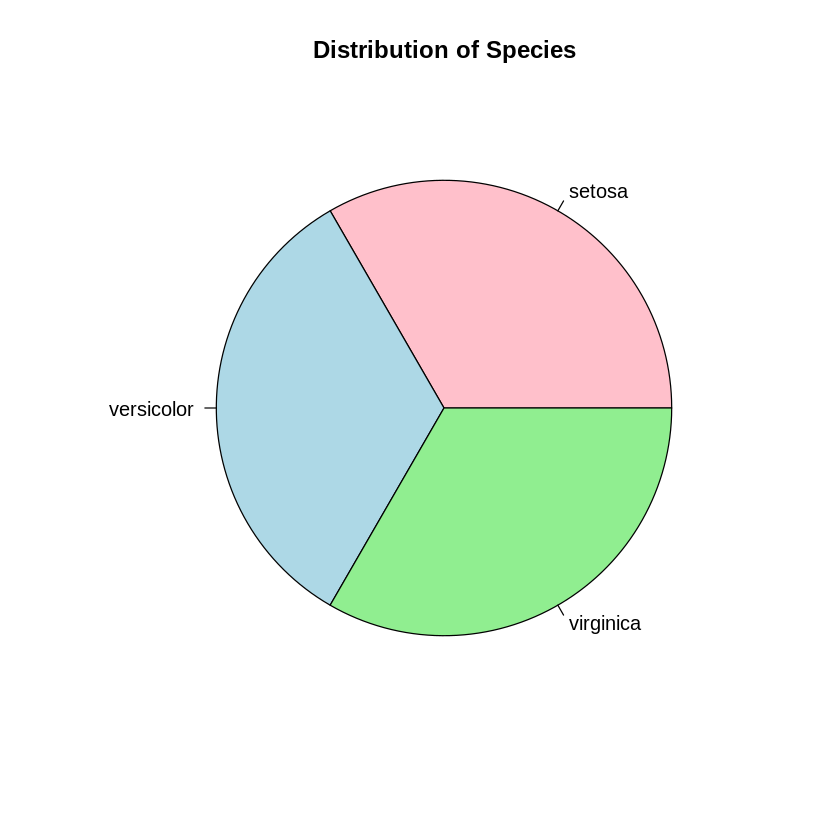

In [90]:
pie(table(iris$Species), main="Distribution of Species", col=c("pink","lightblue","lightgreen"))

5. **Dot Plot**: Displays individual data points as dots along a scale.

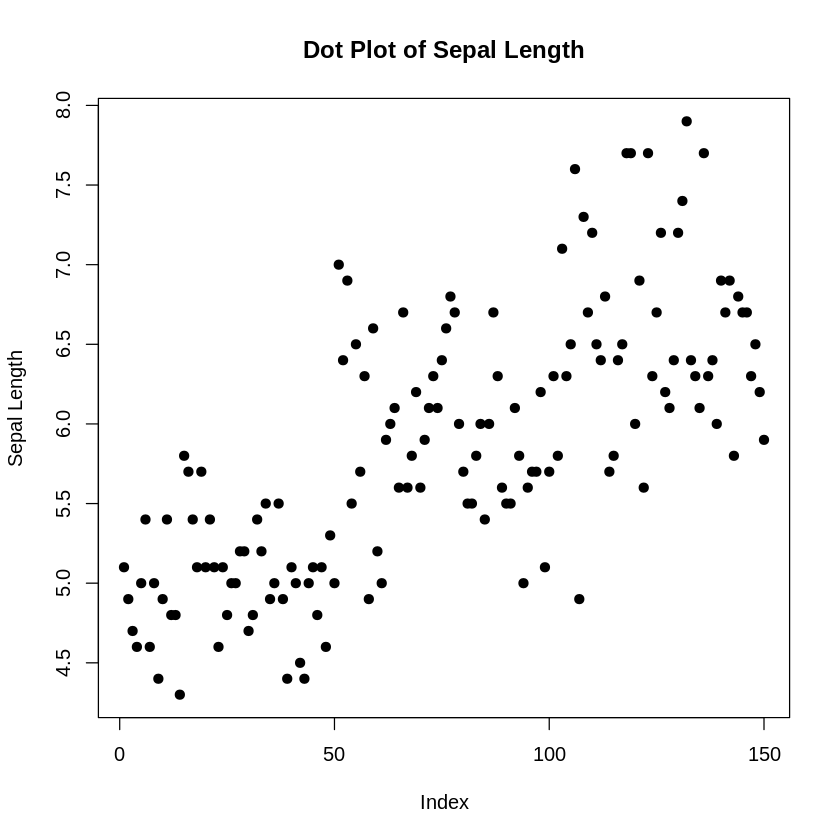

In [91]:
plot(iris$Sepal.Length, pch=19, main="Dot Plot of Sepal Length", xlab="Index", ylab="Sepal Length")

6. **Scatter Plot**: Represents relationships between two continuous variables using dots in two-dimensional space.

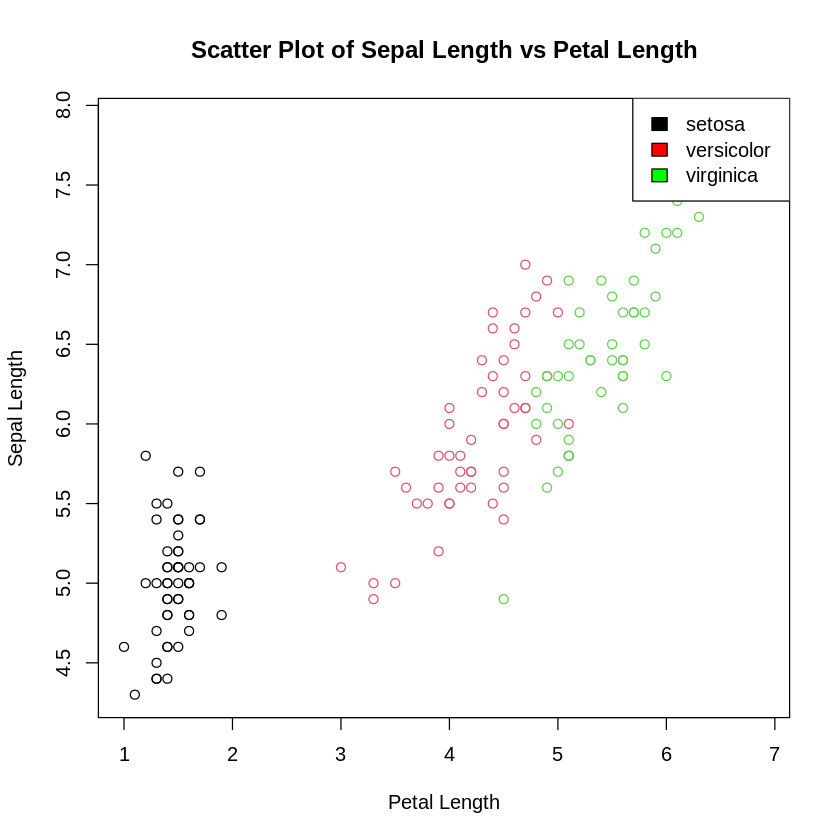

In [93]:
plot(iris$Sepal.Length ~ iris$Petal.Length, main="Scatter Plot of Sepal Length vs Petal Length", xlab="Petal Length", ylab="Sepal Length", col=iris$Species)
legend("topright", legend=unique(iris$Species), fill=c("black","red","green"))

7. **Stem-and-Leaf Plot**: Shows distribution by grouping data values by range.

In [94]:
stem(iris$Sepal.Length, scale=2)


  The decimal point is 1 digit(s) to the left of the |

  43 | 0
  44 | 000
  45 | 0
  46 | 0000
  47 | 00
  48 | 00000
  49 | 000000
  50 | 0000000000
  51 | 000000000
  52 | 0000
  53 | 0
  54 | 000000
  55 | 0000000
  56 | 000000
  57 | 00000000
  58 | 0000000
  59 | 000
  60 | 000000
  61 | 000000
  62 | 0000
  63 | 000000000
  64 | 0000000
  65 | 00000
  66 | 00
  67 | 00000000
  68 | 000
  69 | 0000
  70 | 0
  71 | 0
  72 | 000
  73 | 0
  74 | 0
  75 | 
  76 | 0
  77 | 0000
  78 | 
  79 | 0



8. **Violin Plot**: Combines a box plot and density plot to show distribution across categories.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sm’, ‘zoo’


Loading required package: sm

Package 'sm', version 2.2-5.7: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




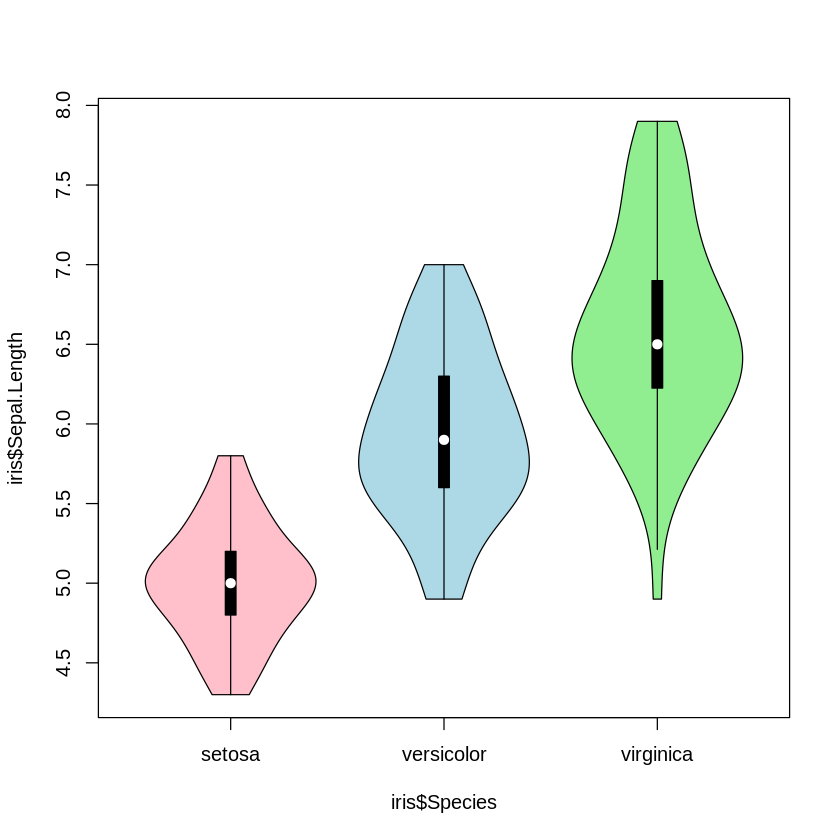

In [95]:
install.packages("vioplot")
library(vioplot)

vioplot(iris$Sepal.Length ~ iris$Species, col=c("pink","lightblue","lightgreen"))

9. **Density Plot**: Offers a smoothed representation of a continuous variable's distribution.

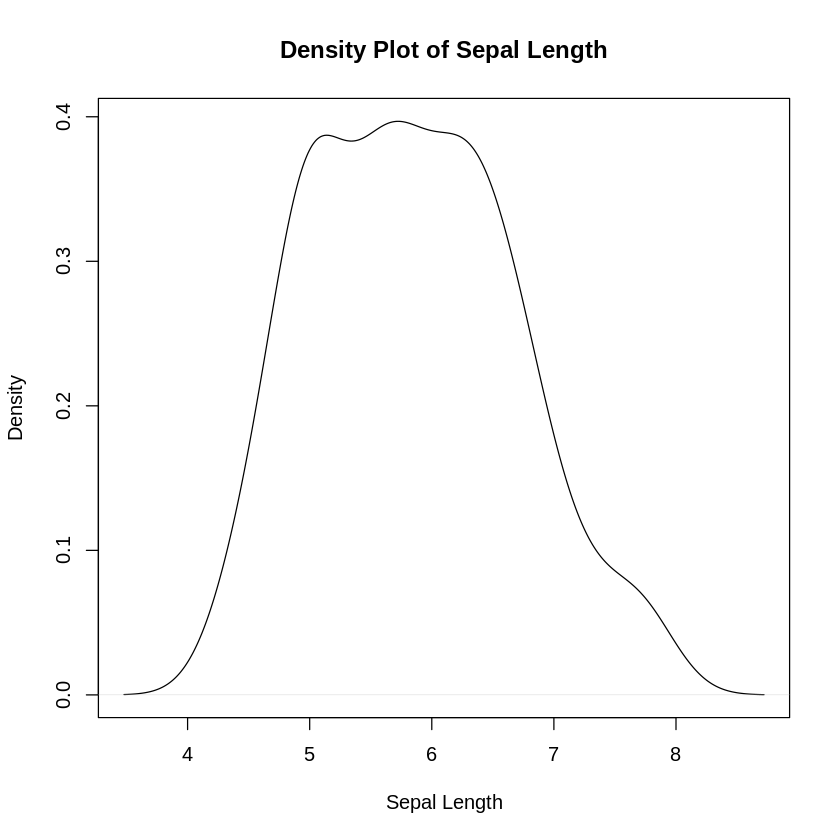

In [96]:
plot(density(iris$Sepal.Length), main="Density Plot of Sepal Length", xlab="Sepal Length", ylab="Density")

10. **Cumulative Frequency Plot**: Demonstrates the proportion of data below each unique value.

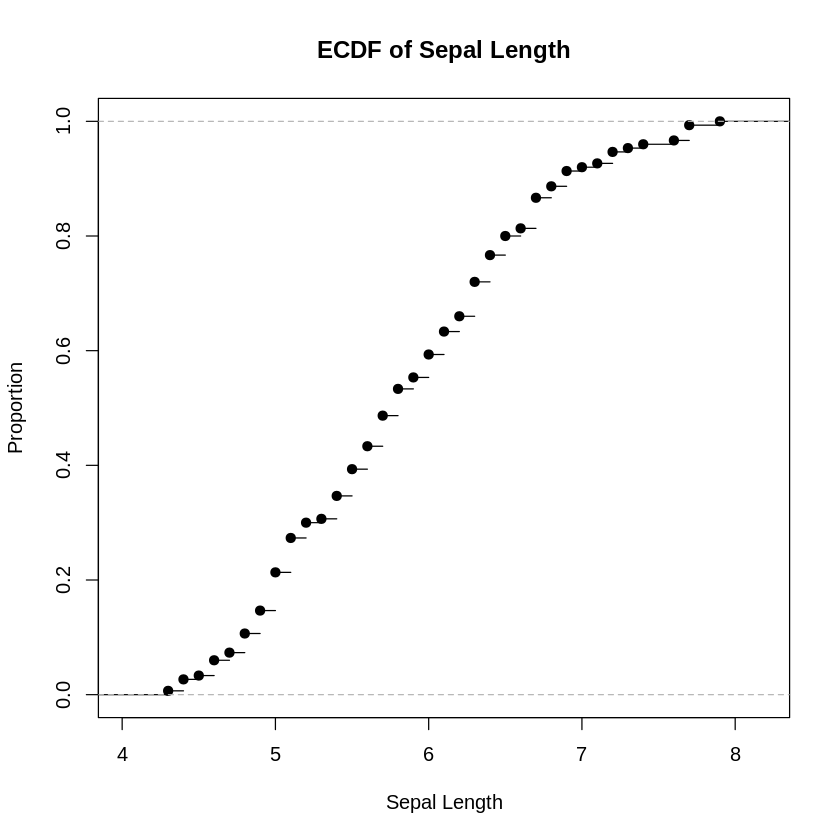

In [97]:
plot(ecdf(iris$Sepal.Length), main="ECDF of Sepal Length", xlab="Sepal Length", ylab="Proportion")

# **2. Contingency Table Analysis**

In [66]:
## Contingent 2x2 table
(tb1 <- table(data$lunch, data$gender))

              
               female male
  free/reduced    189  166
  standard        329  316

In [67]:
# Chi-square test
X <- chisq.test(tb1)
X


	Pearson's Chi-squared test with Yates' continuity correction

data:  tb1
X-squared = 0.37174, df = 1, p-value = 0.5421


Here's a breakdown of the values:

* X-squared or chi-squared value: `0.37174`
    * This is the test statistic that measures how much observed frequencies deviate from expected frequencies. A larger value means that the difference between the observed and expected frequencies is larger.
* df: `1`
    * Stands for "degrees of freedom". In a chi-squared test for independence, the degrees of freedom is calculated as (number of rows - 1) * (number of columns - 1). Given that df=1, it can be inferred that one of your tables (assuming it's a 2x2 table) has 2 rows and 2 columns.
* p−value: `0.5421`
    * The p-value is a measure of the evidence against a null hypothesis. In the context of a chi-squared test, the null hypothesis typically states that there is no association between the two categorical variables. A smaller p-value indicates stronger evidence against the null hypothesis.
    * By conventional criteria, a p-value less than 0.05 is often considered "statistically significant," meaning there's strong evidence against the null hypothesis. Conversely, a p-value greater than 0.05 suggests that you fail to reject the null hypothesis.

Interpretation:
* Given that your p-value is 0.5421 (which is > 0.05), there isn't enough statistical evidence to reject the null hypothesis.
* In the context of this chi-squared test, it suggests that there's no significant association between the two categorical variables you're looking at.

Note that: Chi-squared test should not be used when one of the expected counts is lower than 5.


**In the context of a chi-squared test:**

Expected Count (or Expected Frequency) = (Row Total x Column Total) / Grand Total

For a 2x2 table:

|                | Group A | Group B | Row Total |
|----------------|--------|---------|-----------|
| Category 1     |  a     |  b      |    a+b    |
| Category 2     |  c     |  d      |    c+d    |
| Column Total   | a+c    | b+d     |   n       |

Expected count for (Category 1, Group A) = (a+b) x (a+c) / n

If one or more of the expected counts are less than 5, the chi-squared test might not be the best choice due to potential inaccuracies.


In [68]:
# Fisher's Exact Test
(F <- fisher.test(tb1))


	Fisher's Exact Test for Count Data

data:  tb1
p-value = 0.509
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8366388 1.4297884
sample estimates:
odds ratio 
  1.093467 


Here's the breakdown of the values:

1. **p-value**: `0.509`
   - The p-value represents the probability of observing a relationship as extreme as the one in your data, given that no actual relationship exists (null hypothesis).
   - A p-value less than a commonly chosen significance level (like 0.05) suggests a statistically significant relationship between the variables.
   - Given the p-value of 0.509, you would not reject the null hypothesis at the 0.05 significance level. This implies that there's not enough statistical evidence to suggest a significant association between the two categorical variables.

2. **Alternative Hypothesis**: The true odds ratio is not equal to 1.
   - An odds ratio of 1 indicates no association.
   - An odds ratio greater than 1 suggests increased odds of an event given the factor, while less than 1 indicates decreased odds.

3. **95% Confidence Interval**: `0.8366388` to `1.4297884`
   - This range provides a 95% confidence level for where the true odds ratio lies.
   - The inclusion of the value 1 in this range suggests that the odds ratio might not be significantly different from 1.

4. **Sample Estimates**:
   - **Odds Ratio**: `1.093467`
     - This value suggests a slight increase in odds, but given the p-value and the confidence interval, this increase isn't statistically significant.

**Interpretation**:
The Fisher's Exact Test results do not provide strong evidence for a significant association between the two categorical variables from your table. The calculated odds ratio, while slightly above 1, isn't statistically different from 1 based on the confidence interval and p-value.


In [69]:
## Contingent 2x2 table
(tb2 <- table(data$test.preparation.course, data$gender))

           
            female male
  completed    184  174
  none         334  308

In [70]:
(X <- chisq.test(tb2))


	Pearson's Chi-squared test with Yates' continuity correction

data:  tb2
X-squared = 0.015529, df = 1, p-value = 0.9008


From the above result, we can see that p-value is more than the significance level (0.05). Therefore, we can accept the null hypothesis and conclude that the two variables (gender & test preparation) are independent.

In [71]:
# Class mate data
data1 <- read.csv("https://raw.githubusercontent.com/luuloi/GWAS_Introduction_2023/main/data/Class_mates.csv")
head(data1)

,No.,Name,Age,Height,Weight,No_favorite_song,No_favorite_sport,Love_cooking,Gender,Pass_Maths3
,<int>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<int>
1,1,Loi,41,173,86.5,4,1,2,male,1
2,2,Du,21,180,65.0,20,1,2,male,1
3,3,Duy,25,177,64.0,100,2,1,male,1
4,4,Huy,25,168,65.0,1,1,2,male,0
5,5,Thien,27,165,54.0,2,2,2,male,1
6,6,Vy,31,153,44.0,3,3,1,female,0


In [72]:
(tb3 <- table(data1[c("Gender", "Pass_Maths3")]) )

        Pass_Maths3
Gender   0 1
  female 8 5
  male   2 8

In [73]:
# Fisher's Exact Test
(F <- fisher.test(tb3))


	Fisher's Exact Test for Count Data

data:  tb3
p-value = 0.0903
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  0.7342333 79.1194126
sample estimates:
odds ratio 
   5.85855 


From the above result, we can see that p-value is more than the significance level (0.05). Therefore, we can accept the null hypothesis and conclude that the two variables (gender & test preparation) are independent.

In [74]:
(tb4 <- table(data1[c("Gender", "Love_cooking")]) )

        Love_cooking
Gender   0 1 2
  female 4 6 3
  male   0 6 4

In [75]:
# Fisher's Exact Test
(F <- fisher.test(tb4))


	Fisher's Exact Test for Count Data

data:  tb4
p-value = 0.2097
alternative hypothesis: two.sided


From the above result, we can see that p-value is more than the significance level (0.05). Therefore, we can accept the null hypothesis and conclude that the two variables (gender & test preparation) are independent.

# **3. P-value and Manhattan plot**

In [76]:
# Ensure pacman is installed and loaded
if (!require("pacman")) install.packages("pacman")
library("pacman")

# Install qqman package
pacman::p_load("qqman")

# loading library
library(qqman)

In [77]:
# Check the structure of the dataset
str(gwasResults)

'data.frame':	16470 obs. of  4 variables:
 $ SNP: chr  "rs1" "rs2" "rs3" "rs4" ...
 $ CHR: int  1 1 1 1 1 1 1 1 1 1 ...
 $ BP : int  1 2 3 4 5 6 7 8 9 10 ...
 $ P  : num  0.915 0.937 0.286 0.83 0.642 ...


In [78]:
# Display the first 6 rows of data
head(gwasResults)

,SNP,CHR,BP,P
,<chr>,<int>,<int>,<dbl>
1,rs1,1,1,0.9148060
2,rs2,1,2,0.9370754
3,rs3,1,3,0.2861395
4,rs4,1,4,0.8304476
5,rs5,1,5,0.6417455
6,rs6,1,6,0.5190959


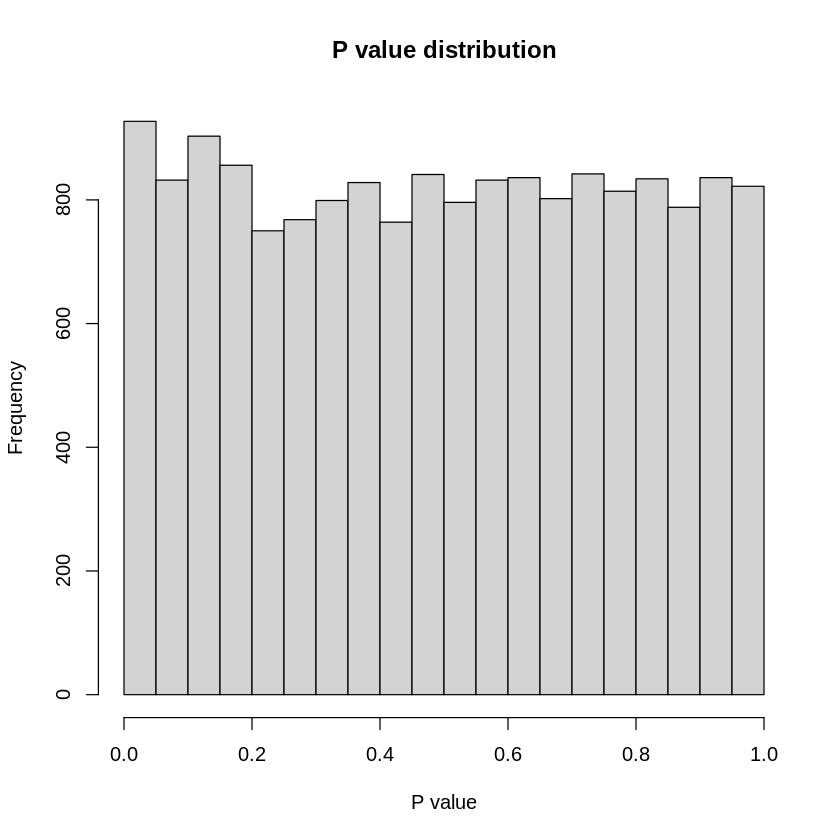

In [79]:
# column P is P-value
hist(gwasResults$P, xlab="P value", main="P value distribution")

In [80]:
# Count SNPs on each chromosome
print(as.data.frame(table(gwasResults$CHR)))

   Var1 Freq
1     1 1500
2     2 1191
3     3 1040
4     4  945
5     5  877
6     6  825
7     7  784
8     8  750
9     9  721
10   10  696
11   11  674
12   12  655
13   13  638
14   14  622
15   15  608
16   16  595
17   17  583
18   18  572
19   19  562
20   20  553
21   21  544
22   22  535


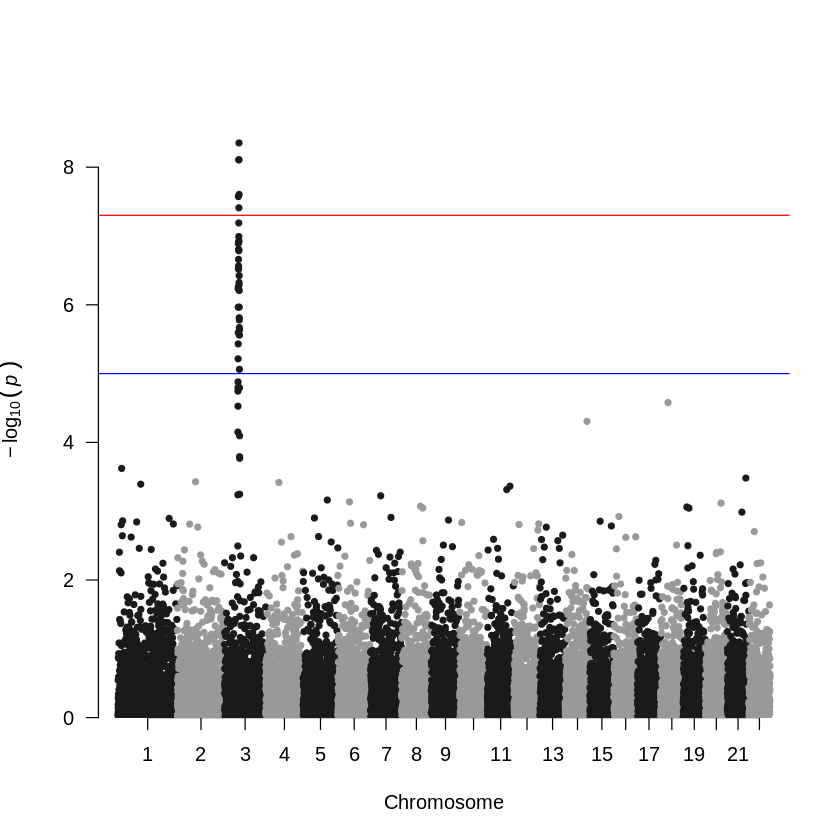

In [81]:
# Create Manhattan plots using default arguments and then with specified columns
manhattan(gwasResults)

manhattan(gwasResults, chr = "CHR", bp = "BP", snp = "SNP", p = "P")

Manhattan plots represent the P values of the entire GWAS on a genomic scale. The P values are represented in genomic order by chromosome and position on the chromosome (x-axis). The value on the y-axis represents the −log10 of the P value (equivalent to the number of zeros after the decimal point plus one).

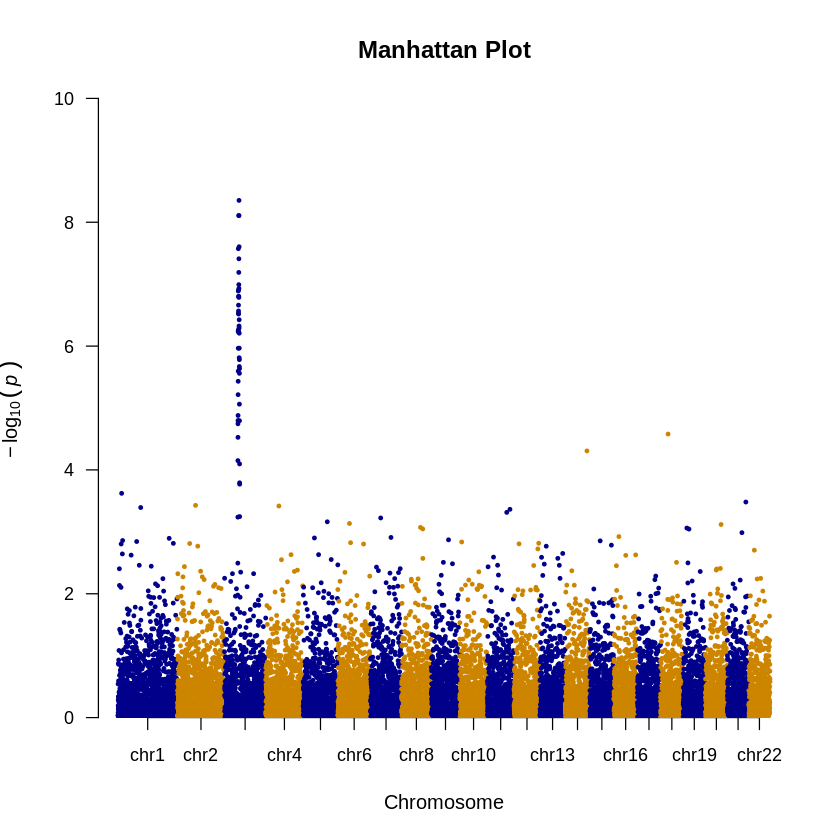

In [82]:
# Customize the Manhattan plot's appearance
manhattan(gwasResults,
          main = "Manhattan Plot", ylim = c(0, 10), cex = 0.6, cex.axis = 0.9,
          col = c("blue4", "orange3"), suggestiveline = FALSE, genomewideline = FALSE,
          chrlabs = paste0("chr", c(1:22)))

In [83]:
# Highlighting specific SNPs of interest
str(snpsOfInterest)

 chr [1:100] "rs3001" "rs3002" "rs3003" "rs3004" "rs3005" "rs3006" "rs3007" ...


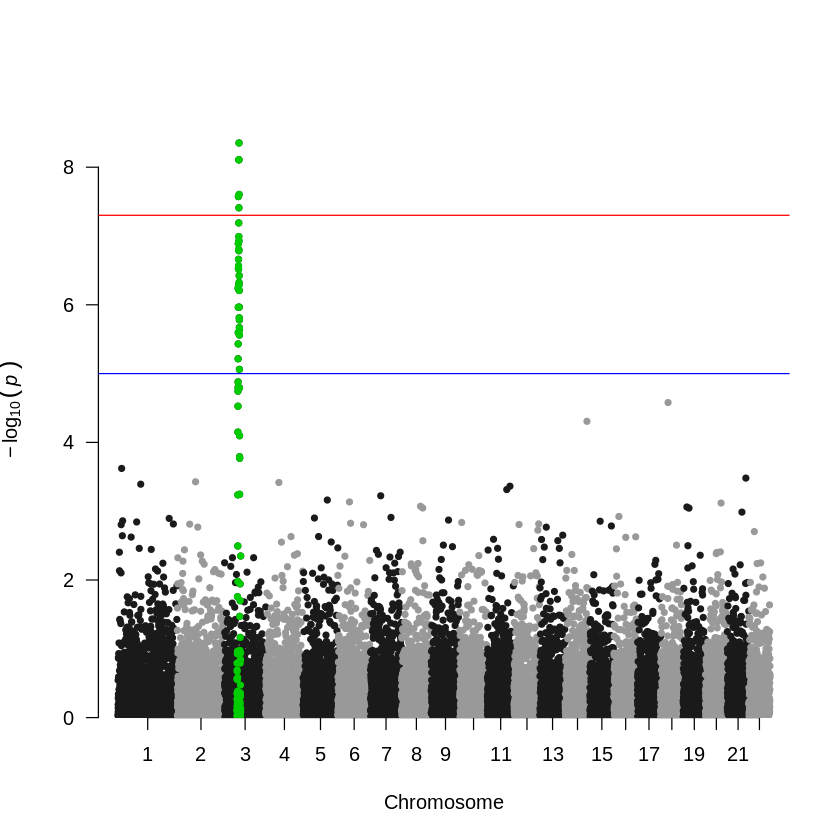

In [84]:
manhattan(gwasResults, highlight = snpsOfInterest)

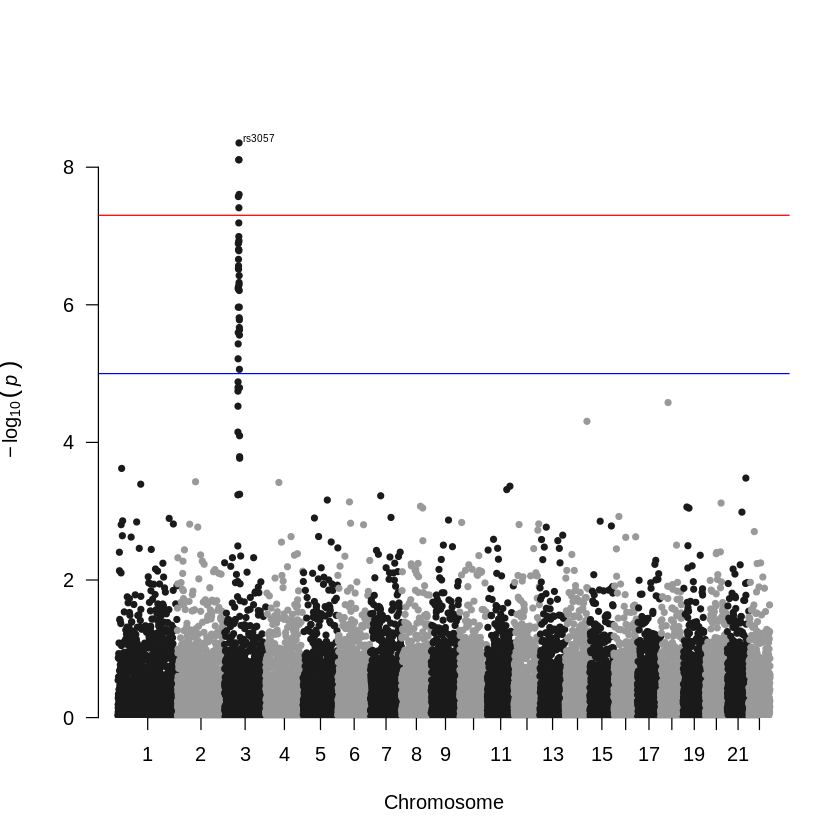

In [85]:
manhattan(gwasResults, annotatePval = 5e-08)

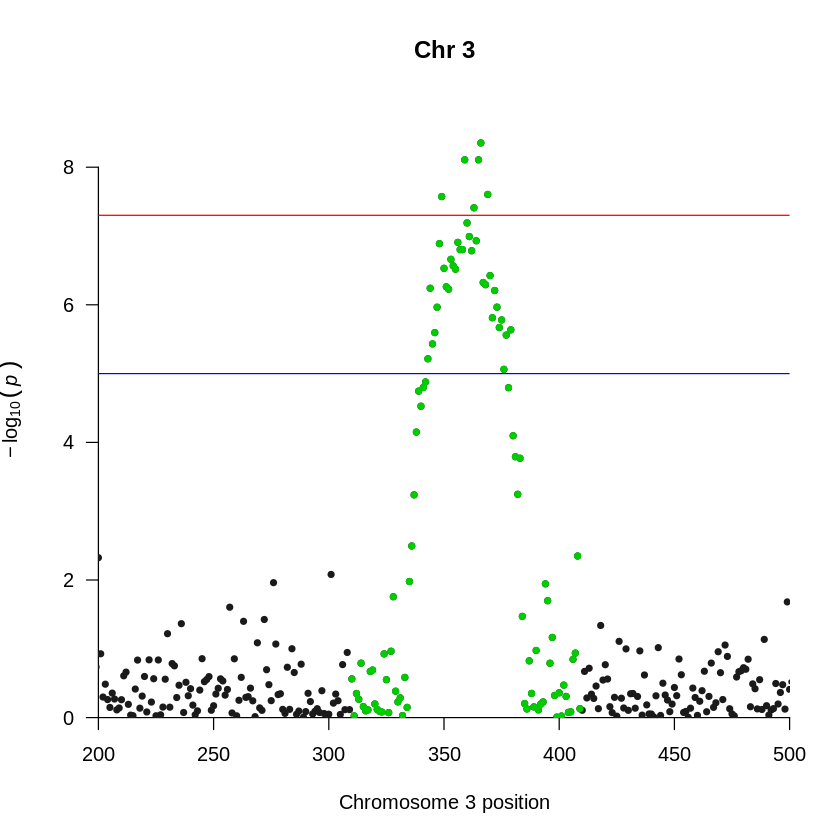

In [86]:
# Highlighting SNPs and focusing on a specific chromosome
manhattan(subset(gwasResults, CHR == 3),
          highlight = snpsOfInterest,
          xlim = c(200, 500),
          main = "Chr 3")